In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle 

In [2]:
from sub_hydro_static import FloaterParameters, Density, CrossSectionalArea, Buoy, Mass, GeneralisedCoordinateSystem 
from GeniE_command import CompHydroCoefficient
from _read_wadam_lis import ReadWadamLis
from plot_hydroD_results import plot_hydroD_results

Unable to import mpi4py. Parallel processing unavailable.
Unable to import petsc4py. Parallel processing unavailable.
Unable to import petsc4py. Parallel processing unavailable.


In [30]:
write = 0

In [31]:
parameters = [[55,60,80,100,120,130],
              [90,90,90,90,90]]
column_diameter = [12]

In [32]:
if write == 1:
    for ii in np.linspace(0,len(column_diameter)-1,len(column_diameter)).astype(int):
        for jj in np.linspace(0,len(parameters[0])-1,len(parameters[0])).astype(int):
            file_loc = r'C:\Users\Joar\Documents\1_Education\NTNU\pickle_files'
            file_name = "\sim_x_%f_y_%f_D%f" % (parameters[0][jj],parameters[1][jj],column_diameter[ii])
            file_path = file_loc + file_name
            floater = FloaterParameters(parameters[0][jj],parameters[1][jj], column_diameter[ii])
            rho = Density()
            area = CrossSectionalArea(floater)
            buoy = Buoy(floater, area, rho)
            mass = Mass(floater, area, buoy, rho)
            coord = GeneralisedCoordinateSystem(floater, area, mass, rho, buoy)
            genie = CompHydroCoefficient()
            genie.compute(coord, mass, floater)
            sim = ReadWadamLis(genie.HydroD_result)
            file_sim = open(file_path, 'wb') 
            pickle.dump(sim, file_sim)
            file_sim.close()

In [33]:
if write == 0:
    pull1 = [70,90,12]
    pull2 = [80,90,12]
    file_loc = r'C:\Users\Joar\Documents\1_Education\NTNU\pickle_files'
    file_name = "\sim_x_%f_y_%f_D%f" % (pull1[0],pull1[1],pull1[2])
    file_path = file_loc + file_name
    infile = open(file_path,'rb')
    sim1 = pickle.load(infile)
    infile.close()
    file_name = "\sim_x_%f_y_%f_D%f" % (pull2[0],pull2[1],pull2[2])
    file_path = file_loc + file_name
    infile = open(file_path,'rb')
    sim2 = pickle.load(infile)
    infile.close()

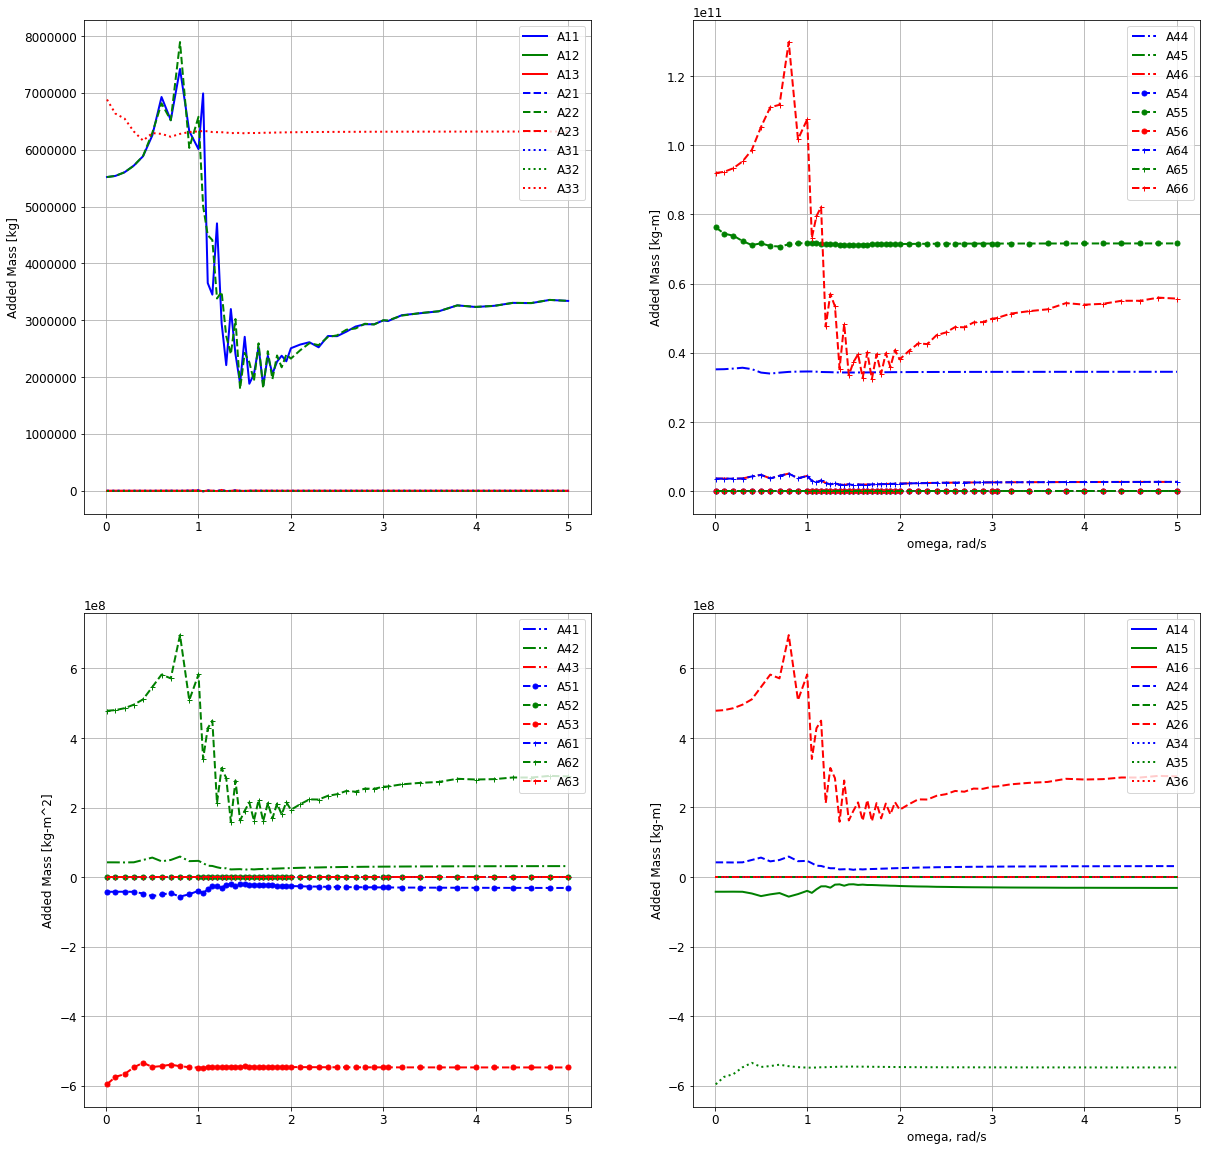

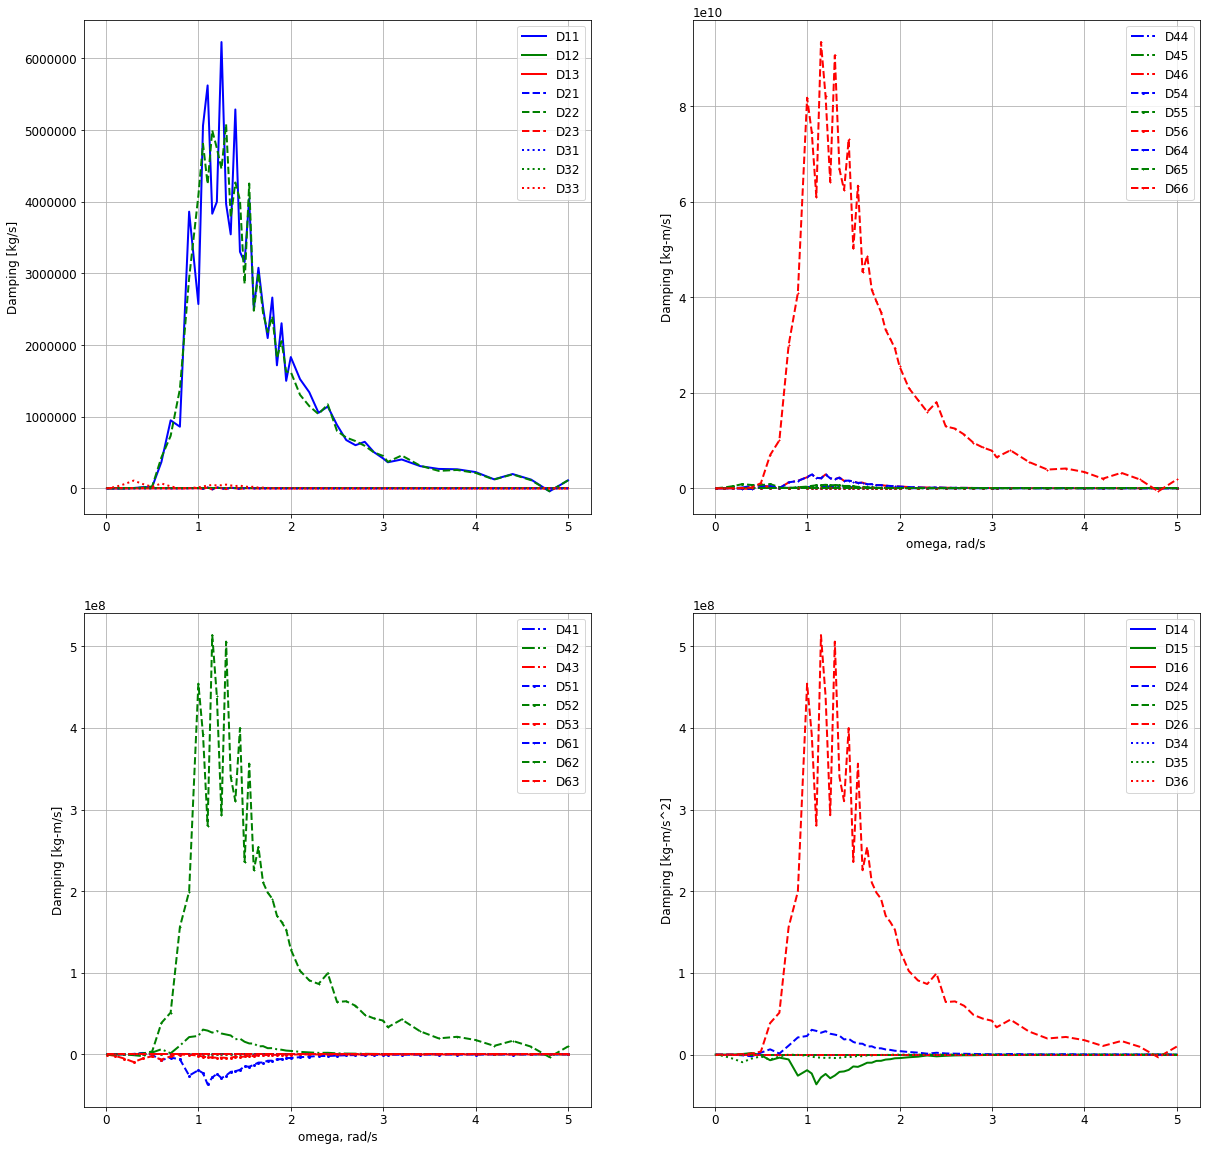

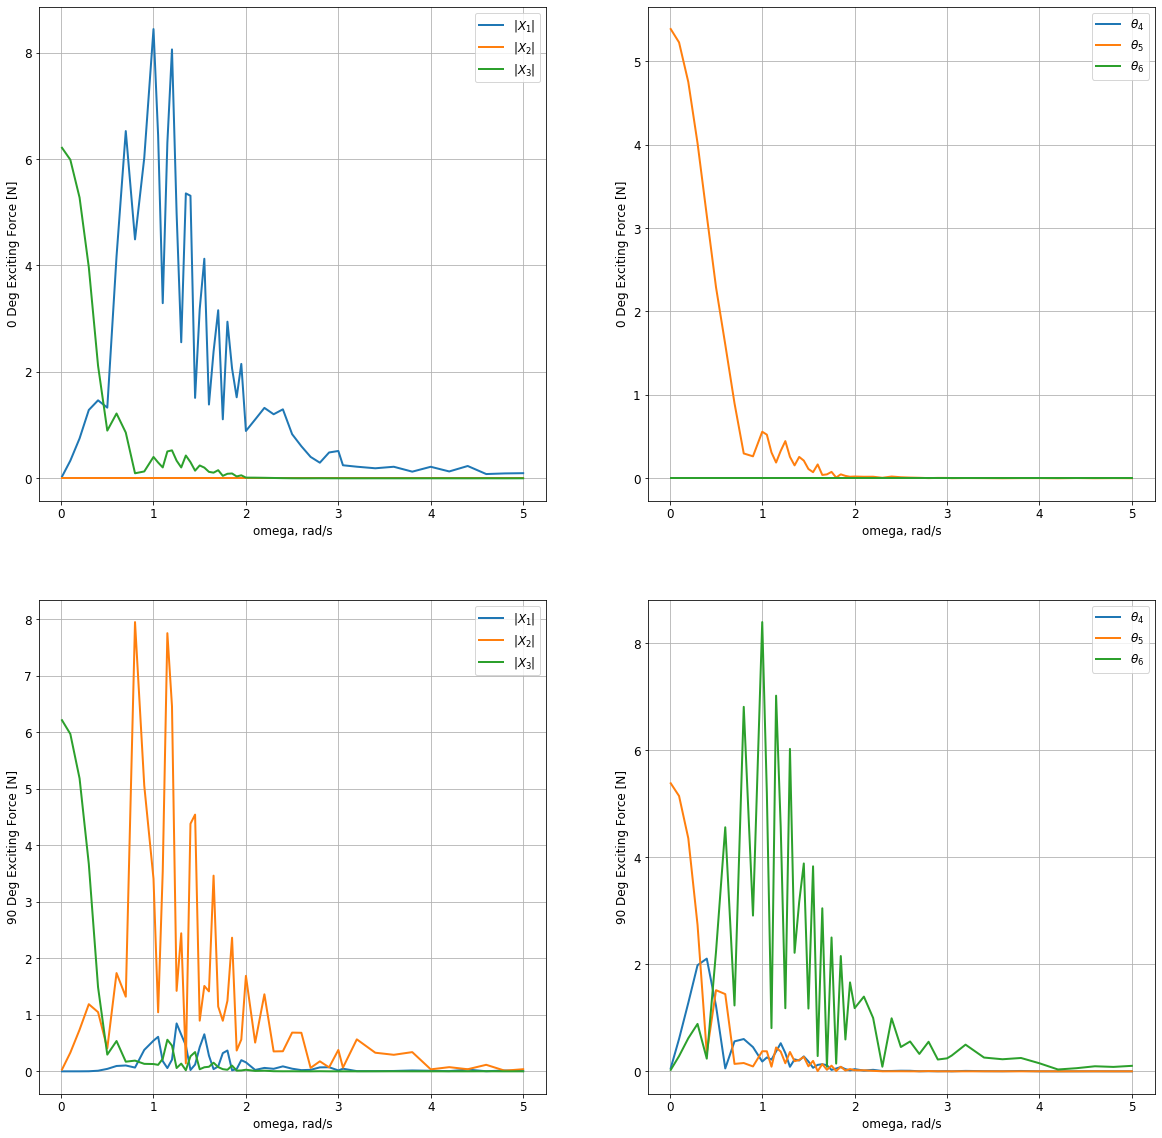

In [6]:
plots = plot_hydroD_results(sim)

## System properties

#### 1. Mass allocation

In [7]:
coord.mass_df

,x,y,z,Mass [kg],weight_contribution
Component,,,,,
Front Ballast,0,0.000,-13.051298,1.490218e+06,0.195762
Back Left Ballast,-130,-45.000,-13.540693,7.214776e+05,0.094777
Back Right Ballast,-130,45.000,-13.540693,7.214776e+05,0.094777
Front Column,0,0.000,-6.000000,6.904814e+05,0.090705
Back Left Column,-130,-45.000,-6.000000,6.904814e+05,0.090705
Back Right Column,-130,45.000,-6.000000,6.904814e+05,0.090705
Front Heave Plate,0,0.000,-13.000000,3.567646e+05,0.046866
Back Left Heave Plate,-130,-45.000,-13.000000,3.567646e+05,0.046866
Back Right Heave Plate,-130,45.000,-13.000000,3.567646e+05,0.046866


#### 2. Buoyancy allocation

In [8]:
coord.buoy_df

,x,y,z,Buoy [kg],buoy_contribution
Component,,,,,
Front Column Buoy,0,0.0,-6.0,1.893438e+06,0.248731
Back Left Column Buoy,-130,45.0,-6.0,1.893438e+06,0.248731
Back Right Column Buoy,-130,-45.0,-6.0,1.893438e+06,0.248731
Front Heave Buoy,0,0.0,-13.0,6.440265e+05,0.084602
Back Left Heave Buoy,-130,45.0,-13.0,6.440265e+05,0.084602
Back Right Heave Buoy,-130,-45.0,-13.0,6.440265e+05,0.084602


####  3. System centre of Mass

In [9]:
coord.COM

[-86.66666666666666, 0.0, 4.016587647261667]

####  4. System centre of Buoy

In [10]:
coord.COB

[-86.66666666666664, 0.0, -7.776649746192893]

####  5. Distance between COM and COB

In [11]:
coord.COB[2] - coord.COM[2]

-11.793237393454561

####  6. Radius of Gyration

In [12]:
coord.RoG

[52.80403105355789, 68.87032145231426, 74.54029534199019]

##### To find classes within an object use dir(object) 

In [13]:
dir(coord)

['COB',
 'COM',
 'RoG',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'ballastbackL',
 'ballastbackR',
 'ballastfront',
 'buoy_columnbackL',
 'buoy_columnbackR',
 'buoy_columnfront',
 'buoy_df',
 'buoy_heavebackL',
 'buoy_heavebackR',
 'buoy_heavefront',
 'columnbackL',
 'columnbackR',
 'columnfront',
 'heavebackL',
 'heavebackR',
 'heavefront',
 'hubL',
 'hubR',
 'mass_df',
 'rog_df',
 'towerL',
 'towerR']

In [14]:
mass.total

7612393.158913428

In [15]:
coord.RoG

[52.80403105355789, 68.87032145231426, 74.54029534199019]

In [16]:
coord.COM

[-86.66666666666666, 0.0, 4.016587647261667]

In [17]:
coord.rog_df

,x,y,z,Mass [kg],I_x,I_y,I_z
Component,,,,,,,
Front Ballast,86.666667,0.000,-17.067885,1.490218e+06,4.341196e+08,1.162732e+10,1.119320e+10
Back Left Ballast,-43.333333,-45.000,-17.557281,7.214776e+05,1.683393e+09,1.577176e+09,2.815767e+09
Back Right Ballast,-43.333333,45.000,-17.557281,7.214776e+05,1.683393e+09,1.577176e+09,2.815767e+09
Front Column,86.666667,0.000,-10.016588,6.904814e+05,6.927740e+07,5.255560e+09,5.186282e+09
Back Left Column,-43.333333,-45.000,-10.016588,6.904814e+05,1.467502e+09,1.365848e+09,2.694795e+09
Back Right Column,-43.333333,45.000,-10.016588,6.904814e+05,1.467502e+09,1.365848e+09,2.694795e+09
Front Heave Plate,86.666667,0.000,-17.016588,3.567646e+05,1.033063e+08,2.783005e+09,2.679699e+09
Back Left Heave Plate,-43.333333,-45.000,-17.016588,3.567646e+05,8.257546e+08,7.732309e+08,1.392373e+09
Back Right Heave Plate,-43.333333,45.000,-17.016588,3.567646e+05,8.257546e+08,7.732309e+08,1.392373e+09


In [18]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [19]:
plt.rcParams["figure.figsize"] = (20,20)
styles = [['-b','-g','-r','-b','-g','-r'],
          ['--b','--g','--r','--b','--g','--r'],
          [':b',':g',':r',':b',':g',':r'],
          ['-.b','-.g','-.r','-.b','-.g','-.r'],
          ['bo--','go--','ro--','bo--','go--','ro--'],
          ['b+--','g+--','r+--','b+--','g+--','r+--']]
legend_A = [['A11','A12','A13','A14','A15','A16'],
         ['A21','A22','A23','A24','A25','A26'],
         ['A31','A32','A33','A34','A35','A36'],
         ['A41','A42','A43','A44','A45','A46'],
         ['A51','A52','A53','A54','A55','A56'],
         ['A61','A62','A63','A64','A65','A66']]

In [20]:
legend_D = [['D11','D12','D13','D14','D15','D16'],
         ['D21','D22','D23','D24','D25','D26'],
         ['D31','D32','D33','D34','D35','D36'],
         ['D41','D42','D43','D44','D45','D46'],
         ['D51','D52','D53','D54','D55','D56'],
         ['D61','D62','D63','D64','D65','D66']]

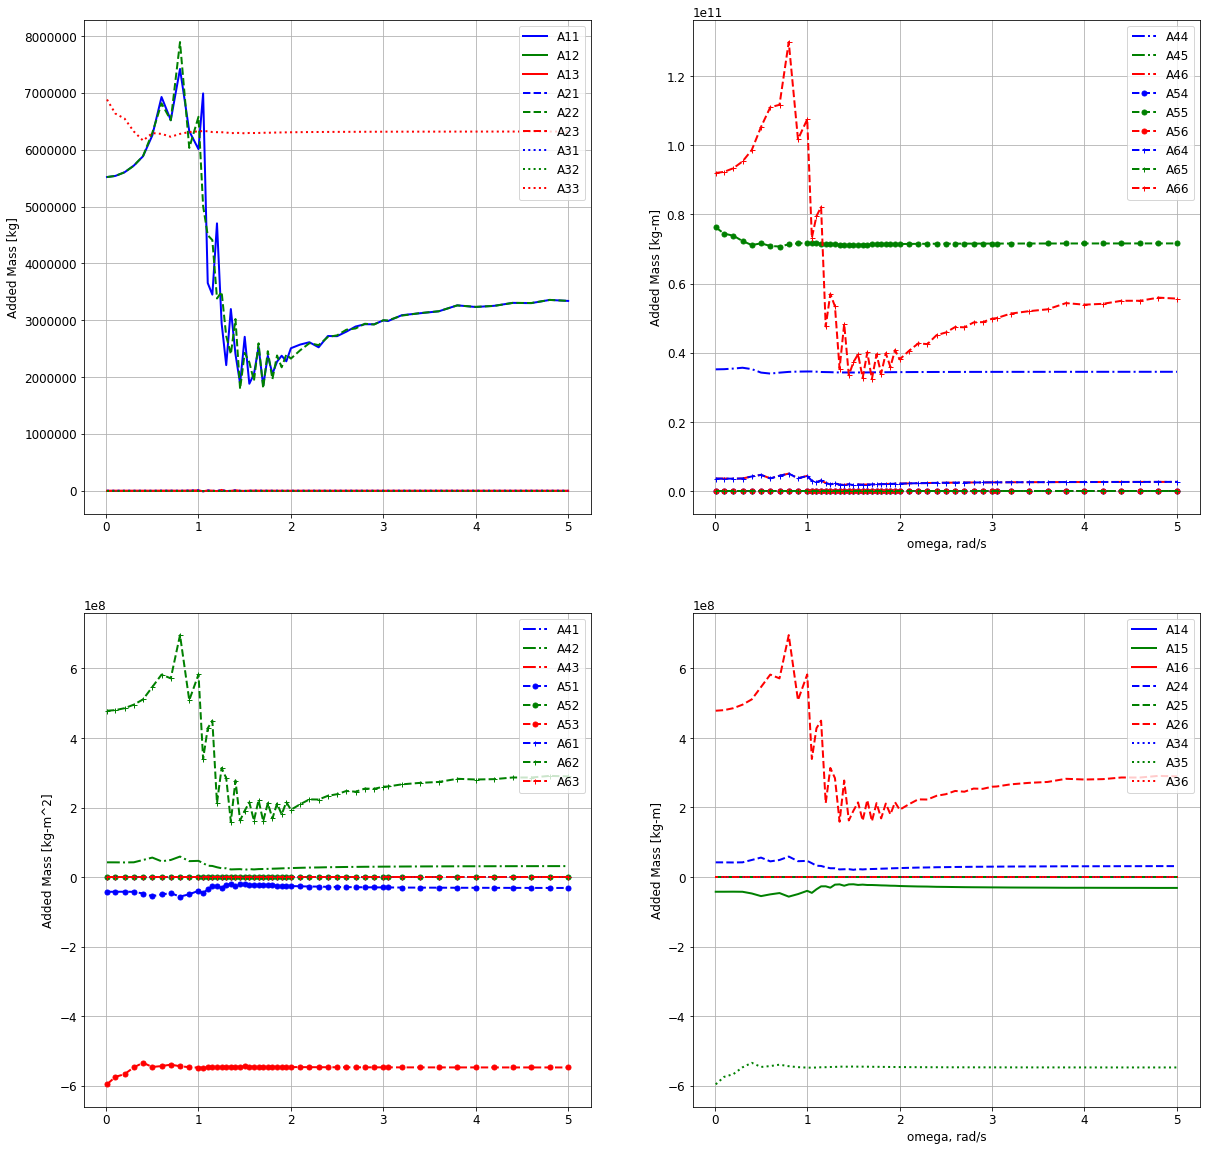

In [21]:
fig, axs = plt.subplots(2, 2)
for ii in np.linspace(0,2,3).astype(int):
    for jj in np.linspace(0,2,3).astype(int):
        axs[0, 0].plot(sim.wave_disc[:,4],sim.ADDEDMASS[:,ii,jj],styles[ii][jj], label=legend_A[ii][jj], linewidth=2, markersize=5)
axs[0,0].legend(loc="upper right")
axs[0,0].set(ylabel='Added Mass [kg]')
axs[0,0].grid(b=True, which='both', axis = 'both')

for ii in np.linspace(3,5,3).astype(int):
    for jj in np.linspace(0,2,3).astype(int):
        axs[1, 0].plot(sim.wave_disc[:,4],sim.ADDEDMASS[:,ii,jj],styles[ii][jj], label=legend_A[ii][jj], linewidth=2, markersize=5)        
axs[1,0].legend(loc="upper right")
axs[1,0].set(ylabel='Added Mass [kg-m^2]')
axs[1,0].grid(b=True, which='both', axis = 'both')
        
for ii in np.linspace(0,2,3).astype(int):
    for jj in np.linspace(3,5,3).astype(int):
        axs[1, 1].plot(sim.wave_disc[:,4],sim.ADDEDMASS[:,ii,jj],styles[ii][jj], label=legend_A[ii][jj], linewidth=2, markersize=5)            
axs[1,1].legend(loc="upper right")        
axs[1,1].set(xlabel='omega, rad/s', ylabel='Added Mass [kg-m]')
axs[1,1].grid(b=True, which='both', axis = 'both')
        
for ii in np.linspace(3,5,3).astype(int):
    for jj in np.linspace(3,5,3).astype(int):
        axs[0, 1].plot(sim.wave_disc[:,4],sim.ADDEDMASS[:,ii,jj],styles[ii][jj], label=legend_A[ii][jj], linewidth=2, markersize=5)  
axs[0,1].legend(loc="upper right")        
axs[0,1].set(xlabel='omega, rad/s', ylabel='Added Mass [kg-m]')
axs[0,1].grid(b=True, which='both', axis = 'both')

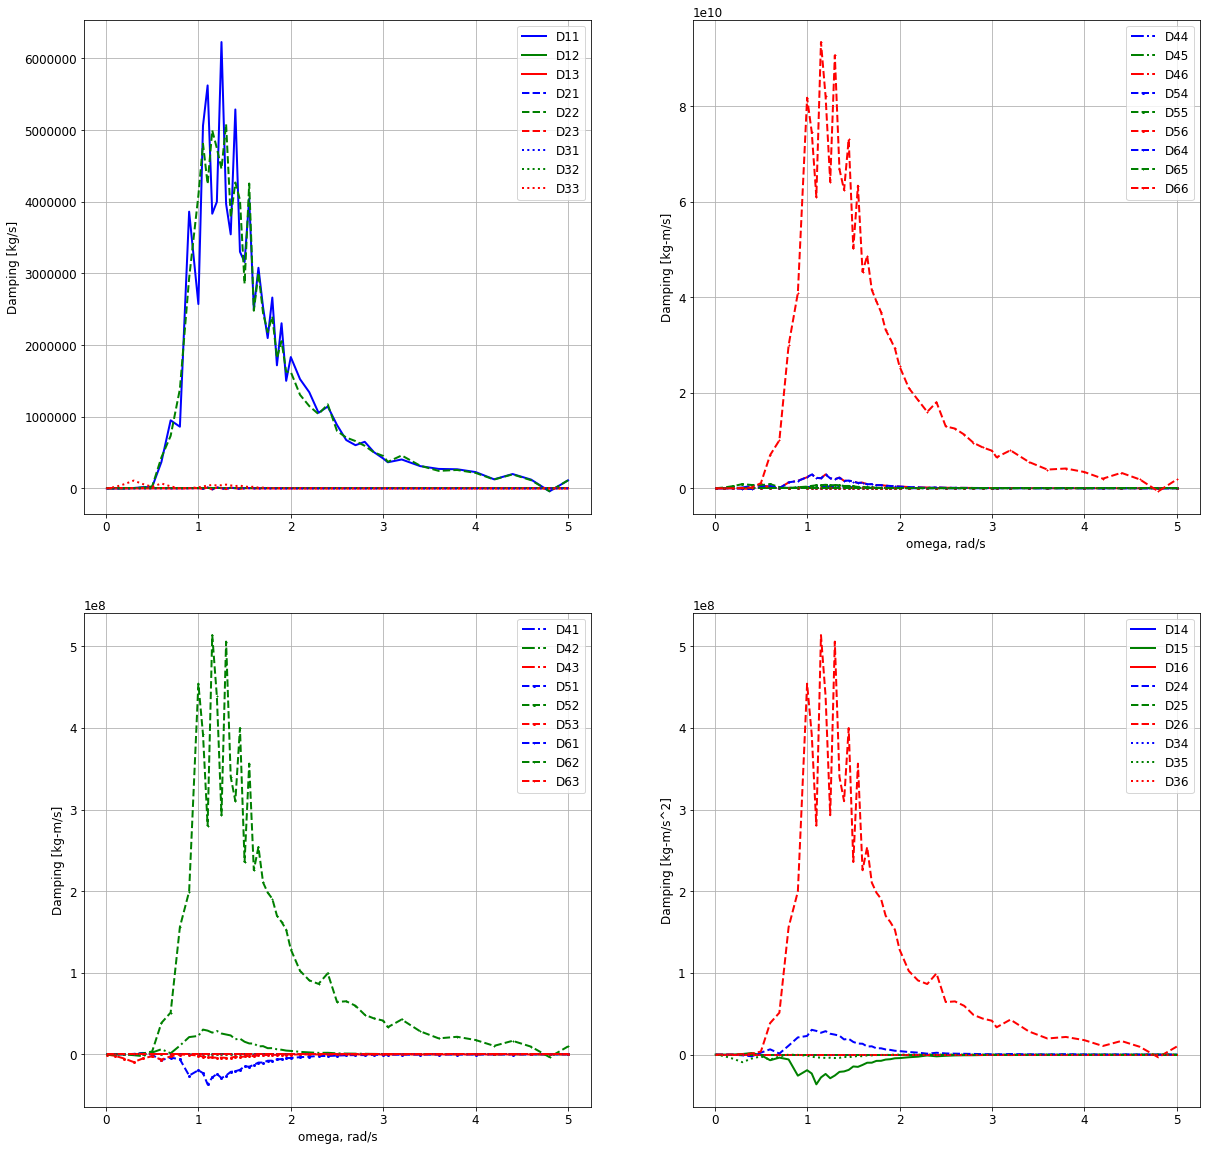

In [22]:
fig, axs = plt.subplots(2, 2)
for ii in np.linspace(0,2,3).astype(int):
    for jj in np.linspace(0,2,3).astype(int):
        axs[0, 0].plot(sim.wave_disc[:,4],sim.DAMPING[:,ii,jj],styles[ii][jj], label=legend_D[ii][jj], linewidth=2, markersize=2)
axs[0,0].legend(loc="upper right")
axs[0,0].set(ylabel='Damping [kg/s]')
axs[0,0].grid(b=True, which='both', axis = 'both')
        
for ii in np.linspace(0,2,3).astype(int):
    for jj in np.linspace(3,5,3).astype(int):
        axs[1, 1].plot(sim.wave_disc[:,4],sim.DAMPING[:,ii,jj],styles[ii][jj], label=legend_D[ii][jj], linewidth=2, markersize=2)        
axs[1,1].legend(loc="upper right")
axs[1,1].set(ylabel='Damping [kg-m/s^2]')
axs[1,1].grid(b=True, which='both', axis = 'both')
        
for ii in np.linspace(3,5,3).astype(int):
    for jj in np.linspace(0,2,3).astype(int):
        axs[1, 0].plot(sim.wave_disc[:,4],sim.DAMPING[:,ii,jj],styles[ii][jj], label=legend_D[ii][jj], linewidth=2, markersize=2)            
axs[1,0].legend(loc="upper right") 
axs[1,0].set(xlabel='omega, rad/s', ylabel='Damping [kg-m/s]')
axs[1,0].grid(b=True, which='both', axis = 'both')
    
        
for ii in np.linspace(3,5,3).astype(int):
    for jj in np.linspace(3,5,3).astype(int):
        axs[0, 1].plot(sim.wave_disc[:,4],sim.DAMPING[:,ii,jj],styles[ii][jj], label=legend_D[ii][jj], linewidth=2, markersize=2)            
axs[0,1].legend(loc="upper right")    
axs[0,1].set(xlabel='omega, rad/s', ylabel='Damping [kg-m/s]')
axs[0,1].grid(b=True, which='both', axis = 'both')


In [23]:
legend_F = ['|$X_1$|','|$X_2$|','|$X_3$|','|$X_4$|','|$X_5$|','|$X_6$|']
legend_T = [r'$\theta_1$',r'$\theta_2$',r'$\theta_3$',r'$\theta_4$',r'$\theta_5$',r'$\theta_6$']

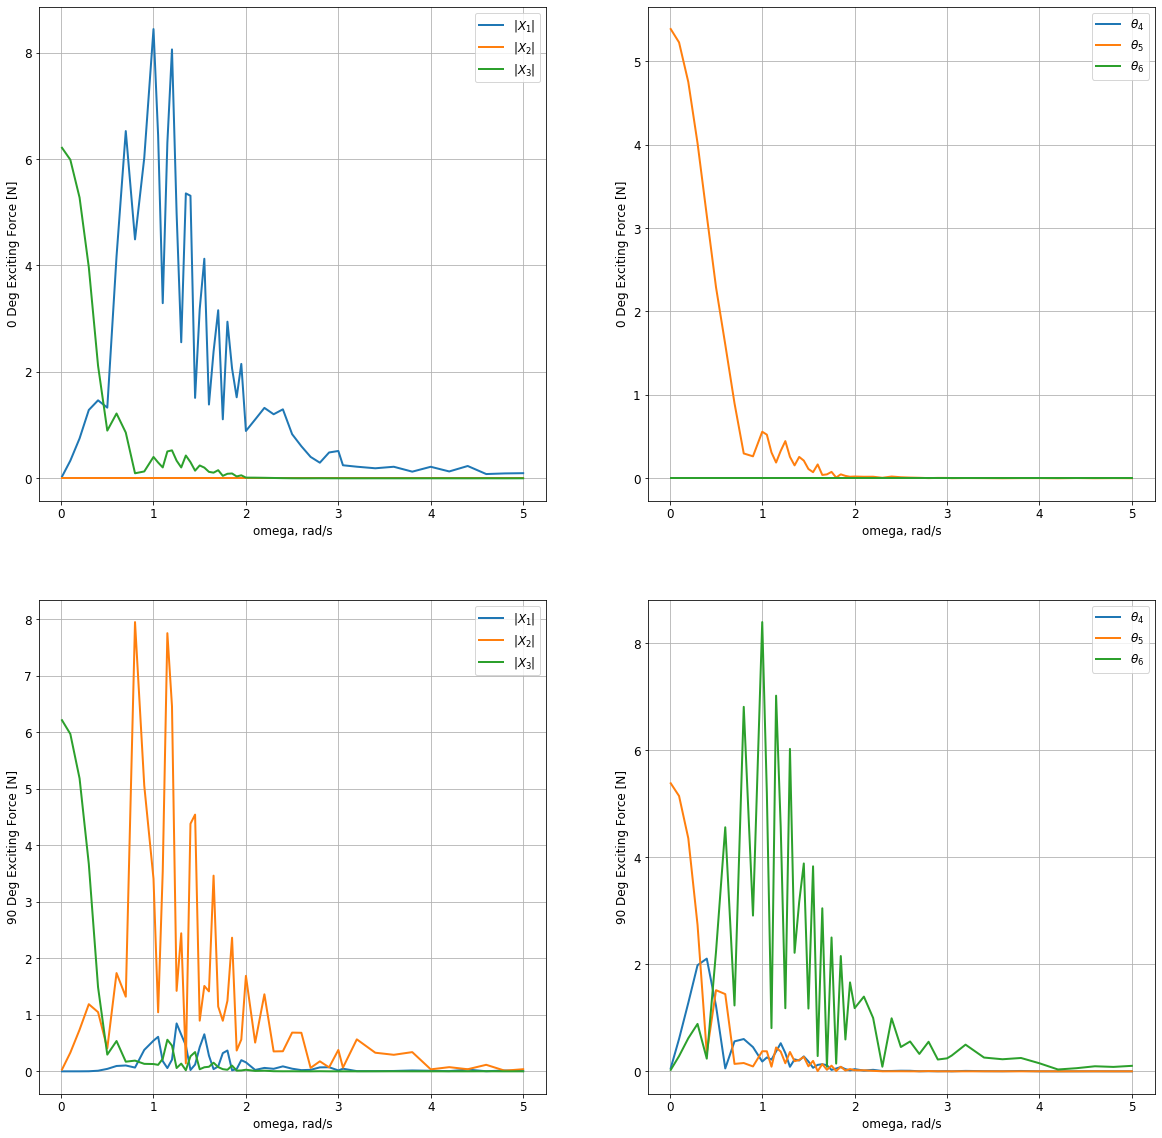

In [24]:
fig, axs = plt.subplots(2,2)
for jj in np.linspace(0,2,3).astype(int):
        axs[0,0].plot(sim.wave_disc[:,4],sim.WAVEEX[0,:,jj,2], label=legend_F[jj], linewidth=2, markersize=2)            
        axs[0,0].legend(loc="upper right") 
        axs[0,0].set(xlabel='omega, rad/s', ylabel='0 Deg Exciting Force [N]')
        axs[0,0].grid(b=True, which='both', axis = 'both')

for jj in np.linspace(3,5,3).astype(int):
        axs[0,1].plot(sim.wave_disc[:,4],sim.WAVEEX[0,:,jj,2], label=legend_T[jj], linewidth=2, markersize=2)            
        axs[0,1].legend(loc="upper right") 
        axs[0,1].set(xlabel='omega, rad/s', ylabel='0 Deg Exciting Force [N]')
        axs[0,1].grid(b=True, which='both', axis = 'both')
        
for jj in np.linspace(0,2,3).astype(int):
        axs[1,0].plot(sim.wave_disc[:,4],sim.WAVEEX[1,:,jj,2], label=legend_F[jj], linewidth=2, markersize=2)            
        axs[1,0].legend(loc="upper right") 
        axs[1,0].set(xlabel='omega, rad/s', ylabel='90 Deg Exciting Force [N]')
        axs[1,0].grid(b=True, which='both', axis = 'both')

for jj in np.linspace(3,5,3).astype(int):
        axs[1,1].plot(sim.wave_disc[:,4],sim.WAVEEX[1,:,jj,2], label=legend_T[jj], linewidth=2, markersize=2)            
        axs[1,1].legend(loc="upper right") 
        axs[1,1].set(xlabel='omega, rad/s', ylabel='90 Deg Exciting Force [N]')
        axs[1,1].grid(b=True, which='both', axis = 'both')
        